In [3]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [4]:
GOOGLE_API_KEY=os.getenv("GOOGLE_API_KEY")
TAVILY_API_KEY=os.getenv("TAVILY_API_KEY")
LANGCHAIN_API_KEY=os.getenv("LANGCHAIN_API_KEY")
LANGCHAIN_PROJECT=os.getenv("LANGCHAIN_PROJECT")

os.environ["GOOGLE_API_KEY"] = GOOGLE_API_KEY
os.environ["TAVILY_API_KEY"] = TAVILY_API_KEY
os.environ["LANGCHAIN_API_KEY"] = LANGCHAIN_API_KEY
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_ENDPOINT"] = "https://api.smith.langchain.com"
os.environ["LANGCHAIN_PROJECT"]=LANGCHAIN_PROJECT

In [42]:
## Loading the model and Embeddings

from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_google_genai import GoogleGenerativeAIEmbeddings

embeddings= GoogleGenerativeAIEmbeddings(model='models/embedding-001')

llm= ChatGoogleGenerativeAI(model='gemini-1.5-flash')

In [6]:
print(llm.invoke('when India got freedom?').content)

India got its freedom from British rule on **August 15, 1947**. 



## Basic Built-in Tools

In [7]:
#Wikipedia tool

from langchain_community.tools import WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper

api_wrapper= WikipediaAPIWrapper()
tool=WikipediaQueryRun(api_wrapper=api_wrapper)

print(tool.run({'query':'langchain'}))

Page: LangChain
Summary: LangChain is a software framework that helps facilitate the integration of large language models (LLMs) into applications. As a language model integration framework, LangChain's use-cases largely overlap with those of language models in general, including document analysis and summarization, chatbots, and code analysis.

Page: Retrieval-augmented generation
Summary: Retrieval augmented generation (RAG) is a technique that grants generative artificial intelligence models information retrieval capabilities. It modifies interactions with a large language model (LLM) so that the model responds to user queries with reference to a specified set of documents, using this information to augment information drawn from its own vast, static training data. This allows LLMs to use domain-specific and/or updated information.  
Use cases include providing chatbot access to internal company data, or giving factual information only from an authoritative source.



Page: DataStax

In [8]:
#Tavily_search

from langchain_community.tools.tavily_search import TavilySearchResults

searchtool= TavilySearchResults()

print(searchtool.run({'query':'who is V.O.Chidhabaram pillai'}))

[{'url': 'https://www.peepultree.world/livehistoryindia/story/eras/vo-chidambaram-pillai', 'content': "V O Chidambaram Pillai, also known by his initials 'VOC', was born on 5th September 1872 in Ottapidaram, Tirunelveli district of Tamil Nadu. He studied at Tuticorin, where he passed the matriculation examination from Caldwell High School. He later moved to Tirunelveli to complete his high school. Pillai's grandfather and his father were"}, {'url': 'https://www.thehindu.com/litfest/freedom-fighter-chidambaram-pillai-tamil-patriot-india/article67697680.ece', 'content': 'V.O. Chidambaram Pillai, freedom fighter from Tamil Nadu, has been celebrated as the man who took on the mercantile might of the British in the early 20th century by starting a shipping company'}, {'url': 'https://leverageedu.com/discover/general-knowledge/famous-personalites-v-o-chidambaram-pillai/', 'content': 'V.O Chidambaram Pillai aka Vallinayagam Olaganathan Chidambaram Pillai (VOC) also known as "Kappalottiya Tami

In [9]:
print(searchtool.name)
print('-'*20)
print(searchtool.description)
print('-'*20)
print(searchtool.args)

tavily_search_results_json
--------------------
A search engine optimized for comprehensive, accurate, and trusted results. Useful for when you need to answer questions about current events. Input should be a search query.
--------------------
{'query': {'description': 'search query to look up', 'title': 'Query', 'type': 'string'}}


### Creating a Custom Tools

In [10]:
from langchain.agents import tool

@tool
def get_word_length(word: str) -> int:
    """this tool returns the length of word"""
    return len(word)


get_word_length.run('sachin tendulkar')

16

In [11]:
from langchain.agents import tool

@tool
def multiply(a: int, b: int) ->int:
    """This tool multiply two numbers"""
    return a * b

print(multiply.name)
print(multiply.description)
print(multiply.args)


multiply
This tool multiply two numbers
{'a': {'title': 'A', 'type': 'integer'}, 'b': {'title': 'B', 'type': 'integer'}}


In [12]:
multiply.invoke({'a':5, 'b':10})

50

## Concept of Agents

### This Agent class from the first version of Langchain(lagacy)

**below image shows the agent workflows**

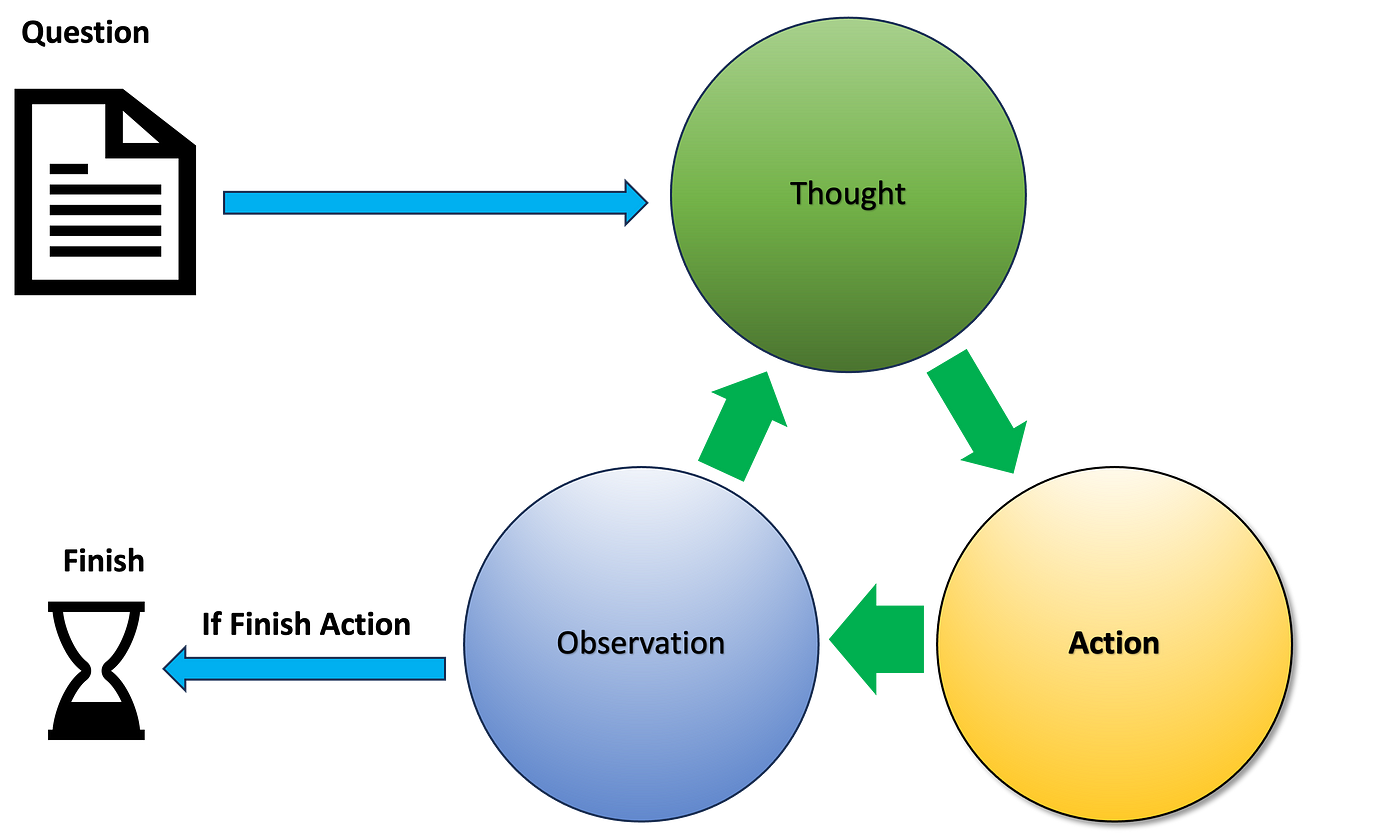

In [13]:
from langchain.agents import AgentType
from langchain.agents import load_tools
from langchain.agents import initialize_agent


In [15]:
tool= load_tools(['wikipedia'], llm=llm)

agent= initialize_agent(tool, llm, agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION, verbose=True)

agent.run('what is llama and who created a llama?')



> Entering new AgentExecutor chain...
Thought: I need to look up information about "llama" on Wikipedia.
Action: wikipedia
Action Input: llama

f:\Generative_AI\Projects\LangGraph-End_to_End\venv\lib\site-packages\wikipedia\wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html.parser"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file f:\Generative_AI\Projects\LangGraph-End_to_End\venv\lib\site-packages\wikipedia\wikipedia.py. To get rid of this warning, pass the additional argument 'features="html.parser"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')



Observation: Page: Llama
Summary: The llama (; Spanish pronunciation: [ˈʎama] or [ˈʝama]) (Lama glama) is a domesticated South American camelid, widely used as a meat and pack animal by Andean cultures since the pre-Columbian era.
Llamas are social animals and live with others as a herd. Their wool is soft and contains only a small amount of lanolin. Llamas can learn simple tasks after a few repetitions. When using a pack, they can carry about 25 to 30% of their body weight for 8 to 13 km (5–8 miles). The name llama (in the past also spelled "lama" or "glama") was adopted by European settlers from native Peruvians.
The ancestors of llamas are thought to have originated from the Great Plains of North America about 40 million years ago and subsequently migrated to South America about three million years ago during the Great American Interchange. By the end of the last ice age (10,000–12,000 years ago), camelids were extinct in North America. As of 2007, there were over seven million lla

'The llama is a domesticated South American camelid used for its meat and wool. It was not created by a specific person but rather domesticated by Andean cultures in pre-Columbian times. There is also a large language model called Llama created by Meta AI.'

### Now we are using Agent pre-defined class 'create_tool_calling_agent' 

In [16]:
from langchain_community.tools.tavily_search import TavilySearchResults

search= TavilySearchResults()

search.run('what is the temperature in chennai?')

[{'url': 'https://www.timeanddate.com/weather/india/chennai/hourly',
  'content': 'Hour-by-Hour Forecast for Chennai, Tamil Nadu, India. Time/General. Weather. Time Zone. DST Changes. Sun & Moon. Weather Today Weather Hourly 14 Day Forecast Yesterday/Past Weather Climate (Averages) Currently: 86 °F. Scattered clouds.'},
 {'url': 'https://www.timeanddate.com/weather/india/chennai/ext',
  'content': 'Chennai 14 Day Extended Forecast. Time/General. Weather. Time Zone. DST Changes. Sun & Moon. Weather Today Weather Hourly 14 Day Forecast Yesterday/Past Weather Climate (Averages) Currently: 77 °F. Light rain.'},
 {'url': 'https://www.bbc.com/weather/1264527',
  'content': 'Chennai - Weather warnings issued. 14-day forecast. Weather warnings issued. today at 18:31. Tonight. Thundery showers and light winds. Thundery Showers. Thundery Showers. Low26°79°.'},
 {'url': 'https://www.accuweather.com/en/in/chennai/206671/weather-forecast/206671',
  'content': 'Get the latest weather forecast for Ch

In [17]:
## using the prompt from langchain hub

from langchain import hub

# Get the prompt to use - you can modify this!
prompt = hub.pull("hwchase17/openai-functions-agent")
prompt.messages

[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=[], input_types={}, partial_variables={}, template='You are a helpful assistant'), additional_kwargs={}),
 MessagesPlaceholder(variable_name='chat_history', optional=True),
 HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['input'], input_types={}, partial_variables={}, template='{input}'), additional_kwargs={}),
 MessagesPlaceholder(variable_name='agent_scratchpad')]

In [19]:
from langchain.agents import create_tool_calling_agent
from langchain.agents import AgentExecutor

# using tavily search as tool
tools= [search]

agent=  create_tool_calling_agent(llm, tools, prompt)

agent_executor= AgentExecutor(agent=agent, tools=tools, verbose=True)

agent_executor.invoke({"input":"Hi! how are you?"})

Key 'title' is not supported in schema, ignoring
Key 'title' is not supported in schema, ignoring




> Entering new AgentExecutor chain...
{'name': 'tavily_search_results_json', 'description': 'A search engine optimized for comprehensive, accurate, and trusted results. Useful for when you need to answer questions about current events. Input should be a search query.', 'parameters': {'type_': 6, 'description': 'Input for the Tavily tool.', 'properties': {'query': {'type_': 1, 'description': 'search query to look up', 'format_': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0', 'properties': {}, 'required': []}}, 'required': ['query'], 'format_': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0'}}
I am doing well! How can I help you today? 😊 


> Finished chain.


{'input': 'Hi! how are you?',
 'output': 'I am doing well! How can I help you today? 😊 \n'}

In [21]:
agent_executor.invoke({"input":"what is temperature in chennai?"})



> Entering new AgentExecutor chain...
{'name': 'tavily_search_results_json', 'description': 'A search engine optimized for comprehensive, accurate, and trusted results. Useful for when you need to answer questions about current events. Input should be a search query.', 'parameters': {'type_': 6, 'description': 'Input for the Tavily tool.', 'properties': {'query': {'type_': 1, 'description': 'search query to look up', 'format_': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0', 'properties': {}, 'required': []}}, 'required': ['query'], 'format_': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0'}}

Invoking: `tavily_search_results_json` with `{'query': 'temperature in chennai'}`


[{'url': 'https://www.timeanddate.com/weather/india/chennai/hourly', 'content': 'Hour-by-Hour Forecast for Chennai, Tamil Nadu, India. Time/General. Weather. Time Zone. DST Changes. Sun & Moon. Weather Today Weather Hourly 14 Day Forecast Yesterday/Past Weather Climat

{'input': 'what is temperature in chennai?',
 'output': 'The temperature in Chennai, India is currently 86°F and scattered clouds. There is a chance of thundery showers tonight. The low temperature will be 79°F. \n'}

### Agents with RAG and Tools

In [22]:
from langchain_community.document_loaders import  WebBaseLoader
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain_community.vectorstores import FAISS


loader= WebBaseLoader('https://blog.langchain.dev/langgraph-studio-the-first-agent-ide/')
documents=loader.load()

# splitting into chunks
text_splitter= RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap= 100)
doc_chunks=text_splitter.split_documents(documents)

USER_AGENT environment variable not set, consider setting it to identify your requests.


In [26]:
from langchain_google_genai import GoogleGenerativeAIEmbeddings

embeddings=GoogleGenerativeAIEmbeddings(model='models/embedding-001')

vectorstore= FAISS.from_documents(doc_chunks, embeddings)
retriever= vectorstore.as_retriever()
retriever.invoke('what is langgraph studio?')[0]

Document(metadata={'source': 'https://blog.langchain.dev/langgraph-studio-the-first-agent-ide/', 'title': 'LangGraph Studio: The first agent IDE', 'description': 'LangGraph Studio provides a specialized agent IDE for visualizing, interacting with, and debugging complex agentic applications. See how to use it on your desktop today.', 'language': 'en'}, page_content='an agent IDE to the world.How to use LangGraph StudioLangGraph Studio is a desktop app, currently available for Apple Silicon. You can download a version here. Support for more platforms is coming soon.After you download and open LangGraph Studio, you will be prompted to log in with your LangSmith account. All users of LangSmith (including those with free accounts) currently have access to LangGraph Studio while it is in beta. You can sign up for a LangSmith account here.After downloading LangSmith, you can open a directory. At a bare minimum, this directory needs to contain a Python file with a graph defined in it. Next, yo

In [37]:
### Creating the retriever tool

from langchain.tools.retriever import create_retriever_tool

retriever_tool= create_retriever_tool(retriever,
                                      'langgraph_studio',
                                      'Search for information about LangGraph studio. For any questions about LangGraph studio, you must use this tool!')


from langchain.tools.tavily_search import TavilySearchResults
search= TavilySearchResults()

tools= [search, retriever_tool]

In [43]:
from langchain.agents import create_tool_calling_agent
from langchain.agents import AgentExecutor
from langchain import hub

# Get the prompt to use - you can modify this!
prompt = hub.pull("hwchase17/openai-functions-agent")

agent= create_tool_calling_agent(llm, tools, prompt)

agent_executor= AgentExecutor(agent= agent, tools= tools, verbose=True)

agent_executor.invoke({"input": "what is a temperature in chennai?"})


Key 'title' is not supported in schema, ignoring
Key 'title' is not supported in schema, ignoring
Key 'title' is not supported in schema, ignoring
Key 'title' is not supported in schema, ignoring




> Entering new AgentExecutor chain...
{'name': 'tavily_search_results_json', 'description': 'A search engine optimized for comprehensive, accurate, and trusted results. Useful for when you need to answer questions about current events. Input should be a search query.', 'parameters': {'type_': 6, 'description': 'Input for the Tavily tool.', 'properties': {'query': {'type_': 1, 'description': 'search query to look up', 'format_': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0', 'properties': {}, 'required': []}}, 'required': ['query'], 'format_': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0'}}
{'name': 'langgraph_studio', 'description': 'Search for information about LangGraph studio. For any questions about LangGraph studio, you must use this tool!', 'parameters': {'type_': 6, 'description': 'Input to the retriever.', 'properties': {'query': {'type_': 1, 'description': 'query to look up in retriever', 'format_': '', 'nullable': False, 'enum

{'input': 'what is a temperature in chennai?',
 'output': 'The temperature in Chennai, Tamil Nadu, India is 81°F. \n'}

In [44]:
agent_executor.invoke({"input": "what is a langGraph studio?"})



> Entering new AgentExecutor chain...
{'name': 'tavily_search_results_json', 'description': 'A search engine optimized for comprehensive, accurate, and trusted results. Useful for when you need to answer questions about current events. Input should be a search query.', 'parameters': {'type_': 6, 'description': 'Input for the Tavily tool.', 'properties': {'query': {'type_': 1, 'description': 'search query to look up', 'format_': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0', 'properties': {}, 'required': []}}, 'required': ['query'], 'format_': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0'}}
{'name': 'langgraph_studio', 'description': 'Search for information about LangGraph studio. For any questions about LangGraph studio, you must use this tool!', 'parameters': {'type_': 6, 'description': 'Input to the retriever.', 'properties': {'query': {'type_': 1, 'description': 'query to look up in retriever', 'format_': '', 'nullable': False, 'enum

{'input': 'what is a langGraph studio?',
 'output': "LangGraph Studio is a desktop application, currently available for Apple Silicon, that serves as an agent IDE for developing LLM applications. It allows you to visualize, interact with, and debug complex agentic applications. It is designed to augment the development experience by making it easy to visualize and interact with agent graphs. You can modify an agent result or the logic underlying a specific node halfway through the agent's trajectory, creating an iterative process. LangGraph Studio is in open beta, and you can download a version for free. \n"}